# Chapter 9 - Data Science
## Data Manipulation

## 0 - Setting up the notebook

In [1]:
import json
import calendar
import numpy as np
from pandas import DataFrame
import arrow
import pandas as pd

## 1- Loading Data

In [2]:
# load data
with open('data.json') as stream:
    data = json.loads(stream.read())

### Creating the DataFrame

In [3]:
# data is good enough for creating an initial DataFrame
df = DataFrame(data)

# let's take a peek at the first 5 rows, to make sure
# nothing weird has happened
df.head()

,cmp_bgt,cmp_clicks,cmp_impr,cmp_name,cmp_spent,user
0,847110,62554,499997,KTR_20190324_20201106_20-35_F_EUR,39383,"{""username"": ""trevorwood"", ""name"": ""Monica Bro..."
1,510835,36176,500001,GRZ_20170521_20180724_30-45_B_GBP,210452,"{""username"": ""trevorwood"", ""name"": ""Monica Bro..."
2,720897,62299,500001,KTR_20171218_20180208_30-40_F_GBP,342507,"{""username"": ""trevorwood"", ""name"": ""Monica Bro..."
3,610337,46084,500000,AKX_20190124_20200804_40-45_B_USD,224361,"{""username"": ""trevorwood"", ""name"": ""Monica Bro..."
4,587428,15676,500000,BYU_20170823_20170903_35-55_F_EUR,449387,"{""username"": ""trevorwood"", ""name"": ""Monica Bro..."


In [4]:
# OK! DataFrame is alive and well!
# let's get a sense of how many rows there are and
# what is their structure.
df.count()

cmp_bgt       5037
cmp_clicks    5037
cmp_impr      5037
cmp_name      5037
cmp_spent     5037
user          5037
dtype: int64

In [5]:
df.describe()

,cmp_bgt,cmp_clicks,cmp_impr,cmp_spent
count,5037.000000,5037.000000,5037.000000,5037.000000
mean,496930.317054,40920.962676,499999.498312,246963.542783
std,287126.683484,21758.505210,2.033342,217822.037701
min,1057.000000,341.000000,499993.000000,114.000000
25%,247663.000000,23340.000000,499998.000000,64853.000000
50%,491650.000000,37919.000000,500000.000000,183716.000000
75%,745093.000000,56253.000000,500001.000000,379478.000000
max,999577.000000,99654.000000,500008.000000,975799.000000


In [6]:
# let's see which are the top and bottom 3 campaigns according
# to budget (regardless of the currency)
df.sort_values(by=['cmp_bgt'], ascending=False).head(3)

,cmp_bgt,cmp_clicks,cmp_impr,cmp_name,cmp_spent,user
3321,999577,8232,499997,GRZ_20180810_20190107_40-55_M_EUR,916563,"{""username"": ""hahnrhonda"", ""name"": ""Amanda Ken..."
2361,999534,53223,499999,GRZ_20180516_20191030_25-30_B_EUR,373360,"{""username"": ""rfarley"", ""name"": ""Mary Woodard""..."
2220,999096,13347,499999,KTR_20180620_20190809_40-50_F_USD,697846,"{""username"": ""kimberly94"", ""name"": ""Benjamin W..."


In [7]:
df.sort_values(by=['cmp_bgt'], ascending=False).tail(3)

,cmp_bgt,cmp_clicks,cmp_impr,cmp_name,cmp_spent,user
4418,1585,25211,499999,AKX_20171231_20180119_25-35_F_EUR,1099,"{""username"": ""scott20"", ""name"": ""Angela Mccorm..."
1193,1340,20895,499997,GRZ_20170803_20180708_40-50_B_EUR,956,"{""username"": ""penny57"", ""name"": ""Courtney Shaw..."
465,1057,76323,500001,BYU_20170913_20190322_30-40_F_EUR,877,"{""username"": ""jacobsonspencer"", ""name"": ""Paul ..."


## 2 - Manipulating the DataFrame

In [8]:
# first, let's explode cmp_name into its components
# and get a separate DataFrame for those

def unpack_campaign_name(name):
    # very optimistic method, assumes data in campaign name
    # is always in good state
    type_, start, end, age, gender, currency = name.split('_')
    start = arrow.get(start, 'YYYYMMDD').date()
    end = arrow.get(end, 'YYYYMMDD').date()
    return type_, start, end, age, gender, currency

campaign_data = df['cmp_name'].apply(unpack_campaign_name)
campaign_cols = [
    'Type', 'Start', 'End', 'Age', 'Gender', 'Currency']
campaign_df = DataFrame(
    campaign_data.tolist(), columns=campaign_cols, index=df.index)
campaign_df.head(3)

,Type,Start,End,Age,Gender,Currency
0,KTR,2019-03-24,2020-11-06,20-35,F,EUR
1,GRZ,2017-05-21,2018-07-24,30-45,B,GBP
2,KTR,2017-12-18,2018-02-08,30-40,F,GBP


In [9]:
# let's join the two dataframes
df = df.join(campaign_df)

In [10]:
# and take a peek: good! It seems to be ok.
df[['cmp_name'] + campaign_cols].head(3)

,cmp_name,Type,Start,End,Age,Gender,Currency
0,KTR_20190324_20201106_20-35_F_EUR,KTR,2019-03-24,2020-11-06,20-35,F,EUR
1,GRZ_20170521_20180724_30-45_B_GBP,GRZ,2017-05-21,2018-07-24,30-45,B,GBP
2,KTR_20171218_20180208_30-40_F_GBP,KTR,2017-12-18,2018-02-08,30-40,F,GBP


In [11]:
# now let's do the same for the JSON user object

def unpack_user_json(user):
    # very optimistic as well, expects user objects
    # to have all attributes
    user = json.loads(user.strip())
    return [
        user['username'],
        user['email'],
        user['name'],
        user['gender'],
        user['age'],
        user['address'],
    ]

user_data = df['user'].apply(unpack_user_json)
user_cols = [
    'username', 'email', 'name', 'gender', 'age', 'address']
user_df = DataFrame(
    user_data.tolist(), columns=user_cols, index=df.index)

In [12]:
# let's join the two dataframes
df = df.join(user_df)

In [13]:
# and take a peek: good! Still in good shape.
df[['user'] + user_cols].head(2)

,user,username,email,name,gender,age,address
0,"{""username"": ""trevorwood"", ""name"": ""Monica Bro...",trevorwood,amathews@gmail.com,Monica Brown,F,29,"8066 Denise Parkway\nMichelletown, WY 59846-5090"
1,"{""username"": ""trevorwood"", ""name"": ""Monica Bro...",trevorwood,amathews@gmail.com,Monica Brown,F,29,"8066 Denise Parkway\nMichelletown, WY 59846-5090"


In [14]:
# now we have the DataFrame completely expanded, so it's
# time to play with it. First, let's fix those ugly column names
better_columns = [
    'Budget', 'Clicks', 'Impressions',
    'cmp_name', 'Spent', 'user',
    'Type', 'Start', 'End',
    'Target Age', 'Target Gender', 'Currency',
    'Username', 'Email', 'Name',
    'Gender', 'Age', 'Address',
]
df.columns = better_columns

In [15]:
# let's add three other columns

def calculate_extra_columns(df):
    # Click Through Rate
    df['CTR'] = df['Clicks'] / df['Impressions']
    # Cost Per Click
    df['CPC'] = df['Spent'] / df['Clicks']
    # Cost Per Impression
    df['CPI'] = df['Spent'] / df['Impressions']
    
calculate_extra_columns(df)

In [16]:
# let's take a peek
df[['Spent', 'Clicks', 'Impressions',
    'CTR', 'CPC', 'CPI']].head(3)

,Spent,Clicks,Impressions,CTR,CPC,CPI
0,39383,62554,499997,0.125109,0.629584,0.078766
1,210452,36176,500001,0.072352,5.817448,0.420903
2,342507,62299,500001,0.124598,5.497793,0.685013


In [17]:
# let's take the values of the first row and verify
clicks = df['Clicks'][0]
impressions = df['Impressions'][0]
spent = df['Spent'][0]

CTR = df['CTR'][0]
CPC = df['CPC'][0]
CPI = df['CPI'][0]

print('CTR:', CTR, clicks / impressions)
print('CPC:', CPC, spent / clicks)
print('CPI:', CPI, spent / impressions)

CTR: 0.1251087506525039 0.1251087506525039
CPC: 0.6295840393899671 0.6295840393899671
CPI: 0.0787664725988356 0.0787664725988356


In [18]:
# let's also add the name of the Day when campaign starts
def get_day_of_the_week(day):
    number_to_day = dict(enumerate(calendar.day_name, 1))
    return number_to_day[day.isoweekday()]

def get_duration(row):
    return (row['End'] - row['Start']).days

df['Day of Week'] = df['Start'].apply(get_day_of_the_week)
df['Duration'] = df.apply(get_duration, axis=1)

In [19]:
# let's verify
df[['Start', 'End', 'Duration', 'Day of Week']].head(3)

,Start,End,Duration,Day of Week
0,2019-03-24,2020-11-06,593,Sunday
1,2017-05-21,2018-07-24,429,Sunday
2,2017-12-18,2018-02-08,52,Monday


In [20]:
# now let's get rid of the cmp_name and user columns,
# which we don't need any more, and address too
final_columns = [
    'Type', 'Start', 'End', 'Duration', 'Day of Week', 'Budget',
    'Currency', 'Clicks', 'Impressions', 'Spent', 'CTR', 'CPC',
    'CPI', 'Target Age', 'Target Gender', 'Username', 'Email',
    'Name', 'Gender', 'Age'
]
df = df[final_columns]

## 3 - Saving to a file in different formats

In [21]:
# CSV format
df.to_csv('df.csv')

In [22]:
# JSON format
df.to_json('df.json')

In [23]:
# Spreadsheet format
df.to_excel('df.xls')

## 4 - Visualizing results

First let's take care of the graphics, we need to instruct the notebook to use matplotlib inline and the serif font family.

In [24]:
%matplotlib inline

In [25]:
# make the graphs nicer
import matplotlib.pyplot as plt
plt.style.use(['classic', 'ggplot'])
# see all available with: print(plt.style.available)
import pylab
pylab.rcParams.update({'font.family' : 'serif'})

In [26]:
df.describe()

,Duration,Budget,Clicks,Impressions,Spent,CTR,CPC,CPI,Age
count,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000
mean,358.565019,496930.317054,40920.962676,499999.498312,246963.542783,0.081842,9.179302,0.493928,53.815565
std,212.487827,287126.683484,21758.505210,2.033342,217822.037701,0.043517,16.070602,0.435644,21.286780
min,1.000000,1057.000000,341.000000,499993.000000,114.000000,0.000682,0.001638,0.000228,18.000000
25%,174.000000,247663.000000,23340.000000,499998.000000,64853.000000,0.046680,1.796924,0.129706,35.000000
50%,354.000000,491650.000000,37919.000000,500000.000000,183716.000000,0.075838,4.984735,0.367432,54.000000
75%,545.000000,745093.000000,56253.000000,500001.000000,379478.000000,0.112506,11.166230,0.758953,72.000000
max,730.000000,999577.000000,99654.000000,500008.000000,975799.000000,0.199309,444.365399,1.951598,90.000000


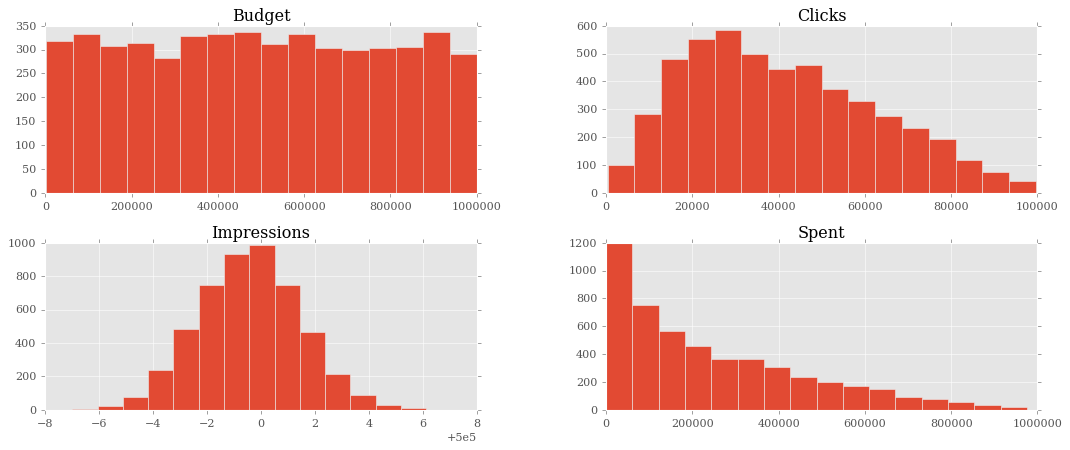

In [27]:
df[['Budget', 'Spent', 'Clicks', 'Impressions']].hist(
    bins=16, figsize=(16, 6));

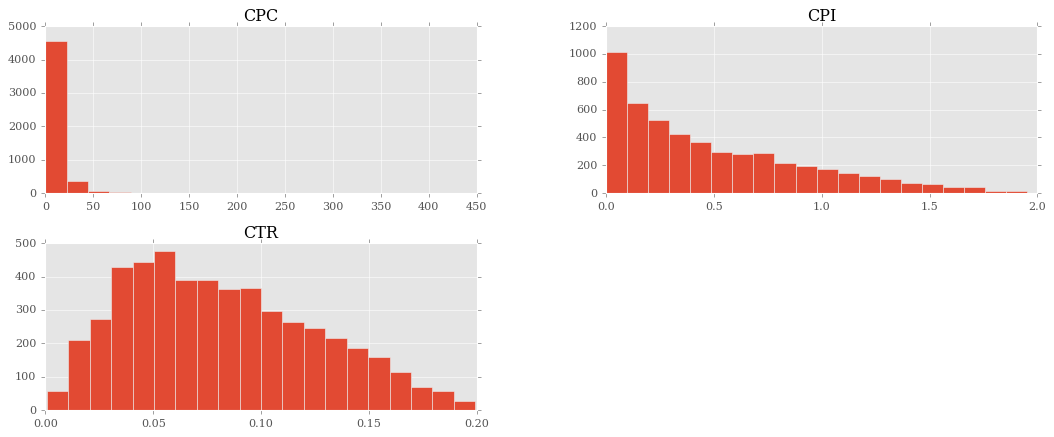

In [28]:
df[['CTR', 'CPC', 'CPI']].hist(
    bins=20, figsize=(16, 6));

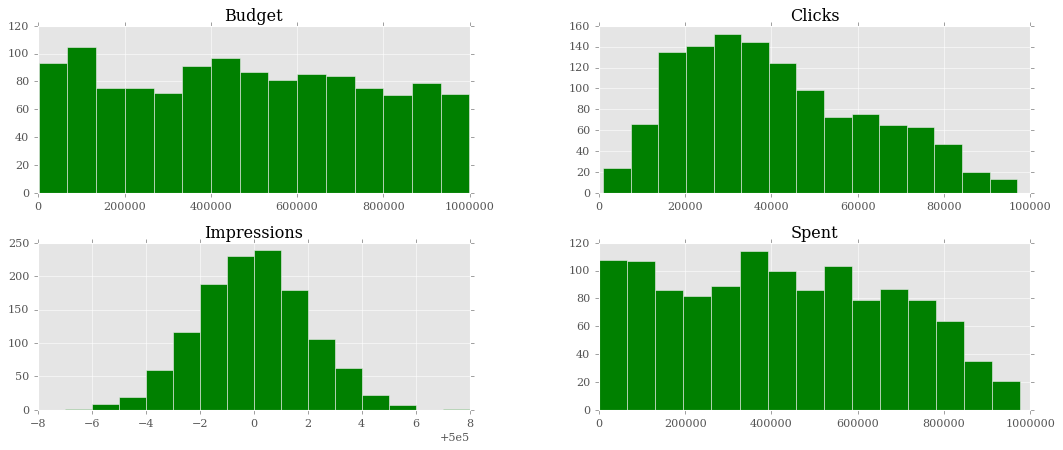

In [29]:
# let's see the campaigns whose spent is > than 75% of the budget
mask = (df.Spent > 0.75 * df.Budget)
df[mask][['Budget', 'Spent', 'Clicks', 'Impressions']].hist(
    bins=15, figsize=(16, 6), color='g');

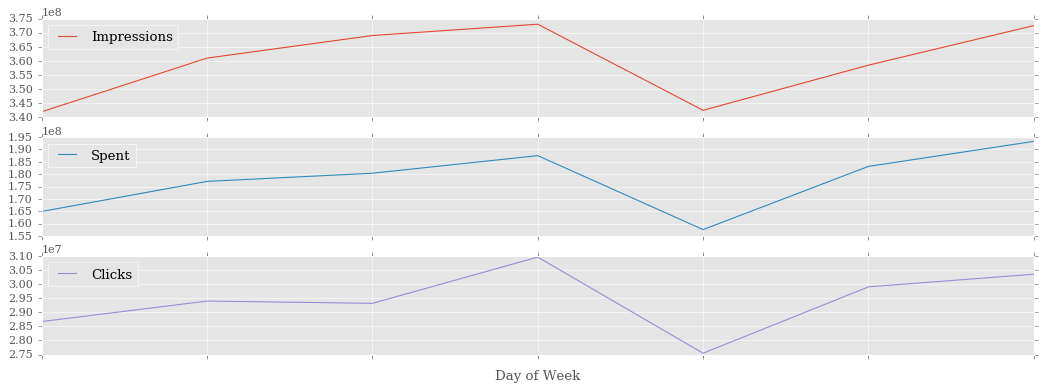

In [30]:
# Let's aggregate per Day of the Week
df_weekday = df.groupby(['Day of Week']).sum()
df_weekday[['Impressions', 'Spent', 'Clicks']].plot(
    figsize=(16, 6), subplots=True);

In [31]:
# Let's aggregate per gender
agg_config = {
    'Impressions': ['mean', 'std'],
    'Spent': ['mean', 'std'],
}

df.groupby(['Target Gender', 'Target Age']).agg(agg_config)

Impressions                    Spent  \
                                   mean       std           mean   
Target Gender Target Age                                           
B             20-25       499999.741573  1.904111  218917.000000   
              20-30       499999.618421  2.039393  237180.644737   
              20-35       499999.358025  2.039048  256378.641975   
              20-40       499999.789474  2.074067  205337.631579   
              20-45       500000.250000  1.983629  267639.166667   
              25-30       499999.617284  1.778819  242552.925926   
              25-35       499999.383562  1.904892  298145.616438   
              25-40       499999.492754  2.083713  224616.608696   
              25-45       499999.635135  2.326584  228775.878378   
              25-50       499999.571429  2.408775  159898.571429   
              30-35       499998.946667  2.046047  270238.800000   
              30-40       499999.835294  2.137238  263671.388235   
              30-45       499999.333333  1.711119  217404.626667   
              30-50       499999.591549  2.214094  226419.563380   
              30-55       499999.000000  1.128152  196147.000000   
              35-40       499999.529412  1.829573  223600.152941   
              35-45       499999.536842  2.056699  188754.926316   
              35-50       499999.246377  1.889645  248600.855072   
              35-55       499999.753425  1.664839  204823.328767   
              35-60       499999.045455  1.587969  300206.954545   
              40-45       499999.488889  2.147611  260295.700000   
              40-50       499999.475000  2.261259  230948.175000   
              40-55       499999.833333  1.989692  279885.423077   
              40-60       499999.205479  2.204534  259383.356164   
              40-65       499998.952381  2.178903  218615.190476   
              45-50       499998.363636  2.479352  248697.500000   
              45-55       499999.444444  2.068279  203553.222222   
              45-60       499999.470588  1.624717  245130.705882   
              45-65       499999.153846  2.511512  400210.846154   
              45-70       500000.000000       NaN  380568.000000   
...                                 ...       ...            ...   
M             20-25       499999.355263  2.108421  277232.276316   
              20-30       499999.635294  2.075062  252140.117647   
              20-35       499999.835821  1.871614  308598.149254   
              20-40       499999.716049  2.157745  257639.567901   
              20-45       499999.875000  1.746425  283152.000000   
              25-30       499999.705882  2.102300  243592.926471   
              25-35       499999.558442  2.003244  255033.285714   
              25-40       499999.588235  1.941190  261641.926471   
              25-45       499999.859155  2.173186  233830.225352   
              25-50       500000.692308  1.436698  263986.846154   
              30-35       499999.250000  1.847750  247700.808824   
              30-40       499999.585714  2.032296  267665.071429   
              30-45       499998.927536  1.904475  278320.768116   
              30-50       499999.555556  2.244799  239779.930556   
              30-55       499999.428571  2.038907  296466.000000   
              35-40       500000.120482  2.002423  265627.951807   
              35-45       499999.325000  1.826493  214914.737500   
              35-50       499999.527473  2.094122  248040.395604   
              35-55       499999.522388  2.040189  260912.134328   
              35-60       499999.476190  2.064438  232113.714286   
              40-45       499999.392857  2.128509  314183.238095   
              40-50       499999.567164  2.031747  232760.492537   
              40-55       499999.294118  2.059262  293658.191176   
              40-60       499999.602941  2.052590  266364.323529   
              40-65       499999.066667  1.791514  436389.400000   
              45

In [32]:
# finally, let's make a pivot table
pivot = df.pivot_table(
    values=['Impressions', 'Clicks', 'Spent'],
    index=['Target Age'],
    columns=['Target Gender'],
    aggfunc=np.sum
)
pivot

Clicks                   Impressions                      \
Target Gender        B        F        M           B         F         M   
Target Age                                                                 
20-25          3827736  3703658  3085169    44499977  45999950  37999951   
20-30          3079195  2927522  3494013    37999971  36499933  42499969   
20-35          3334942  2770677  3045022    40499948  36499954  33499989   
20-40          3092064  2662837  3431962    37999984  30999974  40499977   
20-45          1010212   676005   609134    12000006   8999975   7999998   
25-30          3116392  3793138  2839667    40499969  42999963  33999980   
25-35          2877099  3049833  3252705    36499955  39499963  38499966   
25-40          2647738  3293288  2986094    34499965  38999948  33999972   
25-45          3041911  3479877  2968644    36999973  42499978  35499990   
25-50           543951   758504   561106     6999994   7499983   6500009   
30-35          3017124  3481592  3133905    37499921  40499948  33999949   
30-40          3669051  3341336  2868517    42499986  43999971  34999971   
30-45          3048697  2674776  2757140    37499950  35999962  34499926   
30-50          2889734  3488105  2839362    35499971  41499971  35999968   
30-55           391115   442605   774823     5999988   5999992  10499988   
35-40          3235014  3232398  3722356    42499960  40999937  41500010   
35-45          3656275  2644103  3357337    47499956  33999950  39999946   
35-50          2890300  3375055  3825576    34499948  39499949  45499957   
35-55          2925158  2539689  2580768    36499982  35499948  33499968   
35-60           866290   485854   725269    10999979   6999991  10499989   
40-45          3849775  2418107  3533658    44999954  33499991  41999949   
40-50          3650794  3654377  2493486    39999958  43999927  33499971   
40-55          2919653  3072736  2665059    38999987  34999946  33999952   
40-60          2823327  3718023  2739604    36499942  43499986  33999973   
40-65           917186   405435   649510    10499978   4499994   7499986   
45-50          1074551   957403   518170    10999964   8999978   5999984   
45-55           464818   344886   658403     4499995   4499993   6999999   
45-60           668468   746673   426756     8499991   9499989   6499997   
45-65           530526   477469   667565     6499989   6500009   6999994   
45-70            70449    46870   115733      500000   1000003    999998   

                  Spent                      
Target Gender         B         F         M  
Target Age                                   
20-25          19483613  19852100  21069653  
20-30          18025729  19332305  21431910  
20-35          20766670  16142070  20676076  
20-40          15605660  16776094  20868805  
20-45           6423340   5097761   4530432  
25-30          19646787  21394346  16564319  
25-35          21764630  18876528  19637563  
25-40          15498546  18856134  17791651  
25-45          16929415  19969632  16601946  
25-50           2238580   4329501   3431829  
30-35          20267910  16632634  16843655  
30-40          22412068  22020636  18736555  
30-45          16305347  16519076  19204133  
30-50          16075789  19135698  17264155  
30-55           2353764   3399447   6225786  
35-40          19006013  15564212  22047120  
35-45          17931718  17445344  17193179  
35-50          17153459  18286354  22571676  
35-55          14952103  15913501  17481113  
35-60           6604553   2538960   4874388  
40-45          23426613  16647176  26391392  
40-50          18475854  22094236  15594953  
40-55          21831063  17542345  19968757  
40-60          18934985  19882317  18112774  
40-65           4590919   2985064   6545841  
45-50           5471345   6081472   2401544  
45-55           1831979   2418224   3325907  
45-60           4167222   6040708   4296014  
45-65           5202741   3041239   2579852  
45-70            380568    548168  